# Hospital Readmissions Data Analysis and Recommendations for Reduction (Submitted by Ahrim Han in 3/4/2019)


### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df.loc[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


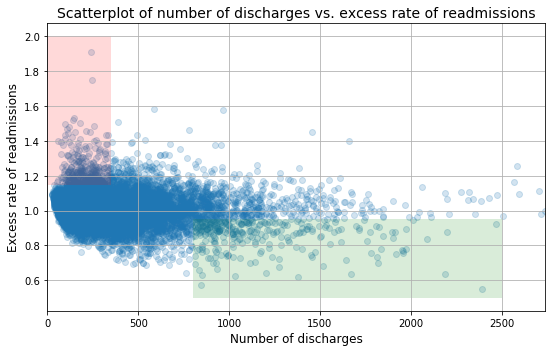

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function

# arhan: 'Number of Discharges' = 0 (index 0 - index 80)
# arhan: exclude the last 3 rows (outlier?)
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
## Exercise

### A. Do you agree with the above analysis and recommendations? Why or why not?

I do not agree with the above analysis with the following reasons.  

1. There is not trend for the incident of excess rate of readmissions and the number of discharges stated in Section A.  
: With the visualization, the red and green shaded in the figure are biased. <br>
: The number of hospitals regarding the discharges are not evenly distributed. There are larger number of facilites/hospitals with low dischage (FLD) than the number of facilities/hospitals with high discharge (FHD). <br>
: The FLD have two potential outliers with extremely high excess readmission.   


2. The supporting statistics in Section B "cherry-pick" the data into the extreme groups.  
: Only 10.96% of all facilities are below 100 discharges, and only 4% are above 1000 discharges. 
It is a very misleading way to present the data. 
The analysis cannot be trusted because the 85% data set is ignored (i.e., the number of discharges are between about 100 and 1000). This is the significant number of data and the analysis based on only 15% data cannot represent the whole data.   


3. Section C reports "a significant correlation" but no estimate of a correlation is provided.  
: There is no correlation analysis between hospital capacity (number of discharges) and readmission rates.


4. The "small capacity" hospitals mentioned in Section D is ambiguous.  
: It isn't clear if this represents a meaningful cutpoint.
****

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

Let's first visualize the data according to the data distribution. The data points shaded in red represent 85% data set. Please note that last 3 data may be excluded as outliers.

Max number of discharges: 6793


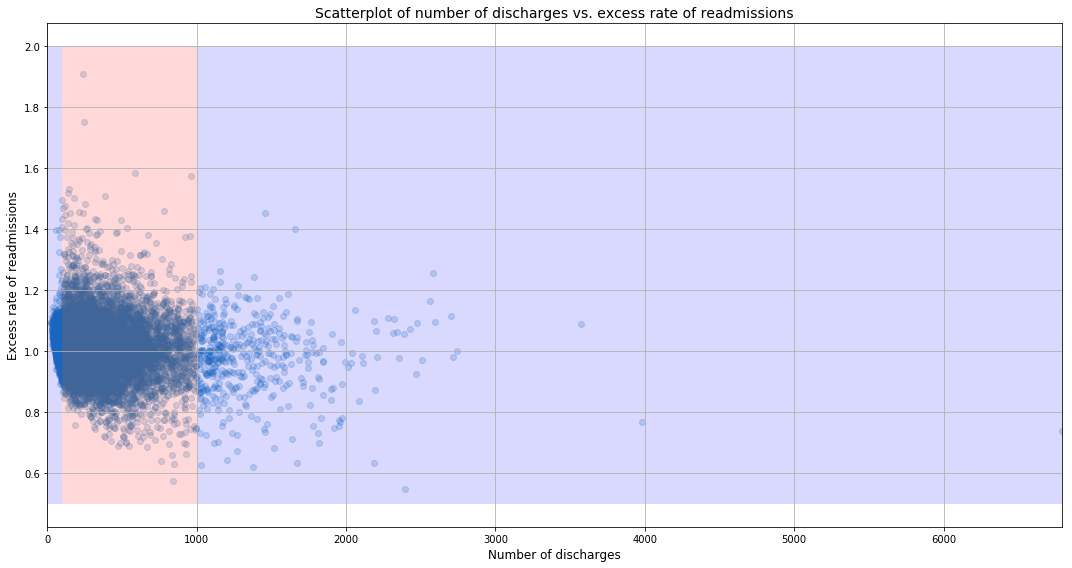

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function

# arhan: 'Number of Discharges' = 0 (index 0 - index 80)
# arhan: exclude the last 3 rows (outlier?)
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:])

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(x, y,alpha=0.2)

#arhan: max range 
print("Max number of discharges: {}".format(clean_hospital_read_df['Number of Discharges'].max()))

ax.fill_between([0,100], .5, 2, facecolor='blue', alpha = .15, interpolate=True)
ax.fill_between([100,1000], .5, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([1000,7000], .5, 2, facecolor='blue', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [6]:
# data cleaning
df = clean_hospital_read_df
#df.rename(columns={'Number of Discharges': 'discharges', 'Excess Readmission Ratio': 'excreadminratio'}, inplace=True)
#sum(clean_hospital_read_df["Number of Discharges"][pd.isnull(clean_hospital_read_df["Excess Readmission Ratio"])] == 0)
df = df[df["Excess Readmission Ratio"].notnull()]
df = df[df["Number of Discharges"].notnull()]
df.shape

(11497, 12)

We verified the following statements and found those are correct. 

* In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1  
* In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1


In [7]:
df_lessthan_100 = df.loc[df["Number of Discharges"] < 100]
print("hospitals/facilities with number of discharges < 100: ")
print("mean excess readmission rate  {:.3f}".format(df_lessthan_100["Excess Readmission Ratio"].mean()))
print("excess readmission rate > 1: {:.0f}%".format(sum(df_lessthan_100["Excess Readmission Ratio"] > 1)/len(df_lessthan_100)*100))

df_greaterthan_1000 = df.loc[df["Number of Discharges"] > 1000]
print("hospitals/facilities with number of discharges > 1000: ")
print("mean excess readmission rate  {:.3f}".format(df_greaterthan_1000["Excess Readmission Ratio"].mean()))
print("excess readmission rate > 1: {:.0f}%".format(sum(df_greaterthan_1000["Excess Readmission Ratio"] > 1)/len(df_greaterthan_1000)*100))

hospitals/facilities with number of discharges < 100: 
mean excess readmission rate  1.023
excess readmission rate > 1: 63%
hospitals/facilities with number of discharges > 1000: 
mean excess readmission rate  0.978
excess readmission rate > 1: 44%


**1. Setup an appropriate hypothesis test.**  
- $H_0$: The number of discharges (i.e., capacity) is not related to excess readmissions.  
- $H_1$: The number of discharges (i.e., capacity) is related to excess readmissions.  


**2. Compute and report the observed significance value (or p-value).**  
**3. Report statistical significance for $\alpha$ = .01.** 

**[Pearson Correlation Coefficient]**

We first scatter the two data for checking if the both variables are normally distributed.

Text(0.5, 1.0, '"Excess Readmission Ratio" distribution')

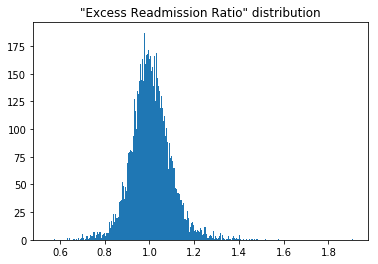

In [8]:
p1 = plt.hist(df["Excess Readmission Ratio"], 500)
plt.title("\"Excess Readmission Ratio\" distribution")

Text(0.5, 1.0, '"Number of Discharges" distribution')

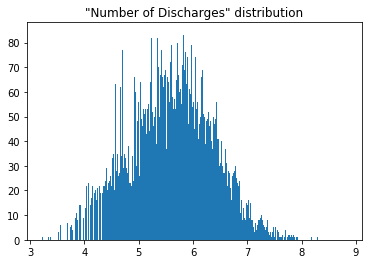

In [9]:
p2 = plt.hist(np.log(df["Number of Discharges"]), 500)
plt.title("\"Number of Discharges\" distribution")

In [10]:
alpha = 0.01
x = np.log(df["Number of Discharges"])
y = df["Excess Readmission Ratio"]

r, p_val = stats.pearsonr(x, y)
print('Pearson correlation coefficient = {:.5f}'.format(r))
print('p_val = {:.10f}'.format(p_val))
if p_val < alpha:
    print ('Null hypothesis rejected, two variables are correlated.')
else:
    print ('Null hypothesis not rejected, two variables are not correlated.')

Pearson correlation coefficient = -0.09767
p_val = 0.0000000000
Null hypothesis rejected, two variables are correlated.


==> The two-tailed test **p-value of 0.0000 is less than the significance level of $\alpha$ = 0.01**, therefore we reject the null hypothesis that the number of discharges (i.e., capacity) is not related to excess readmissions.

There is a very weak negative correlation between the two variables. 
The excess readmission ratio is correlated with the number of discharges, though the correlation coefficient is very small, suggesting the effect of hospital size on readmission ratio is small.

**4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?**

[Practical vs. Statistical Significance](http://statisticsbyjim.com/hypothesis-testing/practical-statistical-significance/)

Statistical significance refers to whether a test statistic estimated from the sample is sufficiently extreme to reject a null hypothesis, because if we assume the null hypothesis is true, the probability of obtaining that estimate by chance is small. Statistical significance can indicate whether there is some association in the data, but it does not indicate how strong that association is.

In contrast, practical significance refers to measures of effect size that estimate the strength of an association in the data. Most effect size estimates are scaled in a way that communicates the strength of the association in some real-world or practical terms. A "practically significant" result reflects a pattern in the data of a meaningful magnitude, and the effect size provides an idea of "how meaningful" that pattern is.  

The correlation is not practically significant when we look into the scatterplot of log of number of discharges and excess rate of readmission.

Text(0.5, 1.0, 'Scatterplot of log of number of discharges vs. excess rate of readmission')

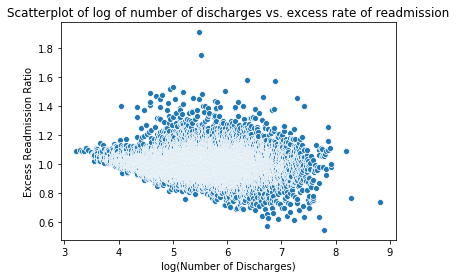

In [11]:
ax = sns.scatterplot(x=x, y=y, data = df)
ax.set(xlabel='log(Number of Discharges)')
ax.set_title("Scatterplot of log of number of discharges vs. excess rate of readmission")

==> In terms of practicality, we think that the correlation is NOT strong enough between the capacity and excess readmission rates.

In this case statistical significance and practical significance disagree. While there is a statistically significant impact of discharges on excess readmissions, the effect size is negligible (i.e., change in discharges does not cause a practical change in excess readmissions). 

We insist that the correlation is statistically significant but practically not significant.
Therefore,we would not recommend that small-capacity hospitals be required to demonstrate upgraded resource allocation, or that incentives be provided for consolidation. 
Instead, we might try to obtain data on other factors at the hospital level that show a meaningful association with excess readmission rates.

**[Two Sample $t-$Test]**  

We test the difference of the excess readmission rates between small and large capacity groups.  
The original analysis (preliminary analysis given) recommends that hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation. 

- $H_0$: There is **NO difference** between the excess readmission ratios of small (number of discharges < 100) and large (number of discharges > 1000) hospitals/facilities.  
- $H_1$: There is difference between the excess readmission ratios of small (number of discharges < 100) and large (number of discharges > 1000) hospitals/facilities.  

In [12]:
small_df = df.loc[df['Number of Discharges'] < 100, 'Excess Readmission Ratio']
large_df = df.loc[df['Number of Discharges'] > 1000, 'Excess Readmission Ratio']

t, p_val = stats.ttest_ind(small_df, large_df)
print('p = {:.10f}'.format(p_val))
if p_val < alpha:
    print('Null hypothesis rejected, the excess readimission ratios of large and small hospitals are different.')
else:
    print('Null hypothesis not rejected, the excess readimission ratios of large and small hospitals are the same.')

p = 0.0000000000
Null hypothesis rejected, the excess readimission ratios of large and small hospitals are different.


==> We reject the null hypothesis. However, it is pracally not significant, which is not consistent with the preliminary analysis.

**5. Look at the scatterplot above.**  

- What are the advantages and disadvantages of using this plot to convey information?

  **Advantages of the scatterplot**:
    - It displays all the data points in one view, which can be useful in identifying some trends or odd patterns that might not be seen otherwise. 
    - The scatterplot can also help identify any extreme data points that could be problematic at the analysis stage, such as outliers or miscoded/misentered variables.  
    
  **Disadvantages of the scatterplot**:
  - When the scatterplot is dense, it can be difficult to perceive a trend even if it exists. 
  - Also, a perceived trend from the scatterplot could be misleading, because because there is no indication of model fit or pattern.  

- Construct another plot that conveys the same information in a more direct manner.  

The purpose is to show the relationship between excess readmission rates and the number of discharges.  
We effectively visualize those relationship with various scatterplot graphs.

Text(0.5, 0.98, 'Scatterplot: log of number of discharges vs. excess rate of readmission')

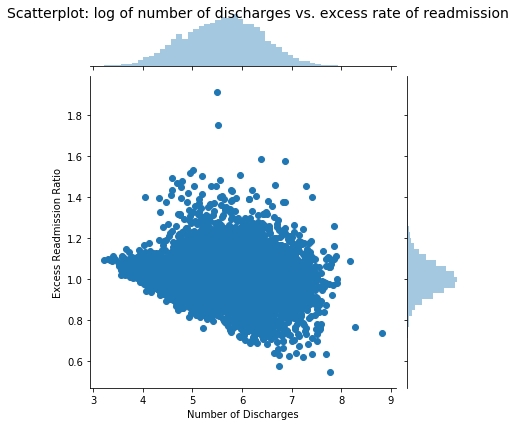

In [13]:
h = sns.jointplot(x, y, data=df)

# # JointGrid has a convenience function
# h.set_axis_labels('log(Number of Discharges)', 'Excess Readmission Ratio', fontsize=12)

# # or set labels via the axes objects
# #h.ax_joint.set_xlabel('new x label', fontweight='bold')

# # also possible to manipulate the histogram plots this way, e.g.
# h.ax_marg_y.grid(False) 

# # labels appear outside of plot area, so auto-adjust
# plt.tight_layout()

#title
h.fig.suptitle("Scatterplot: log of number of discharges vs. excess rate of readmission", size=14)

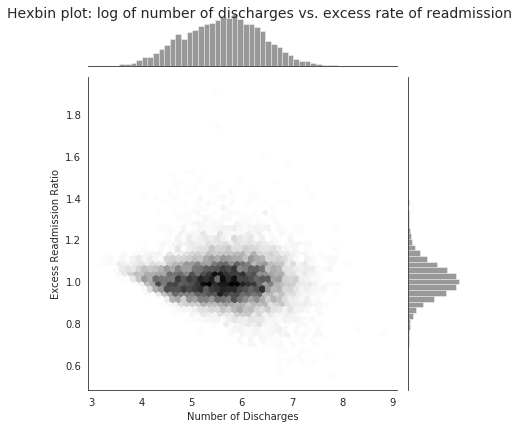

In [14]:
with sns.axes_style("white"):
    h = sns.jointplot(x=x, y=y, kind="hex", color="k")
    h.fig.suptitle("Hexbin plot: log of number of discharges vs. excess rate of readmission", size=14)

Text(0.5, 0.98, 'Kernel density estimation: log of number of discharges vs. excess rate of readmission')

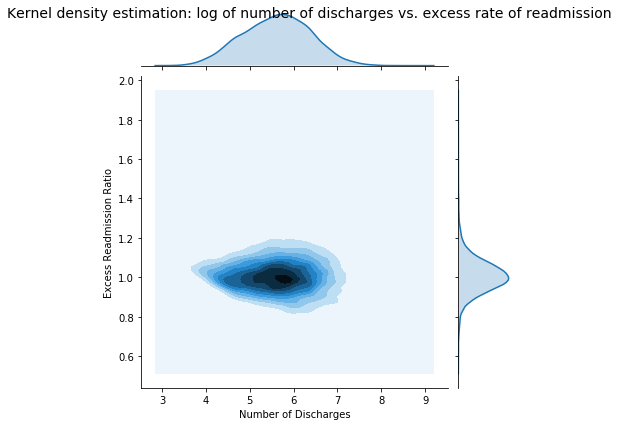

In [15]:
h = sns.jointplot(x=x, y=y, data=df, kind="kde")
h.fig.suptitle("Kernel density estimation: log of number of discharges vs. excess rate of readmission", size=14)